In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
data.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


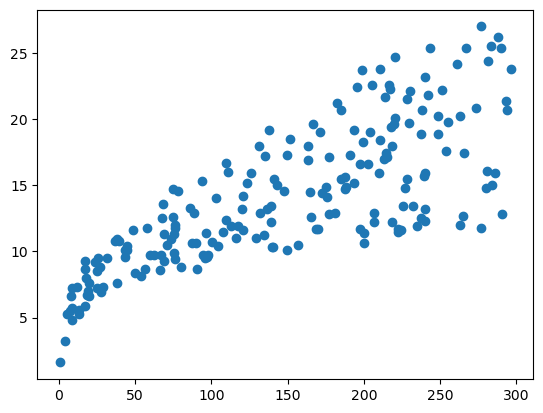

In [5]:
#here avg expense spend on TV is high and low on radio
#maximum sales is 27 and minimym is 1.6

#checking with tv advertisement
plt.scatter(data['TV'],data['Sales'])

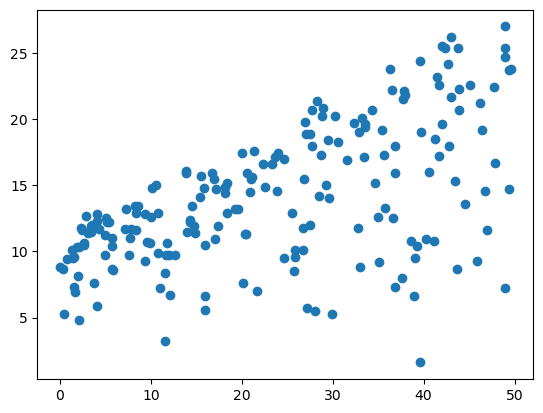

In [6]:
#checking with radio advertisement
plt.scatter(data['Radio'],data['Sales'])

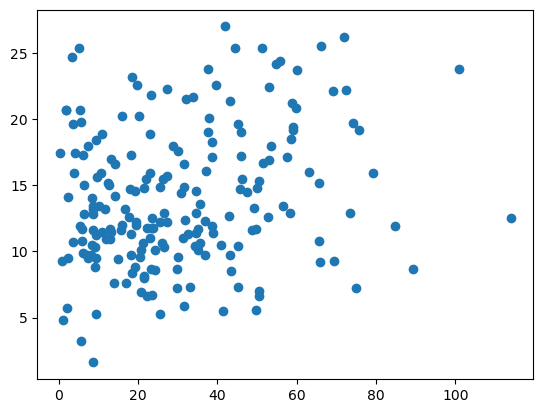

In [7]:
#checking with newspaper advertisement
plt.scatter(data['Newspaper'],data['Sales'])

<Axes: ylabel='Frequency'>

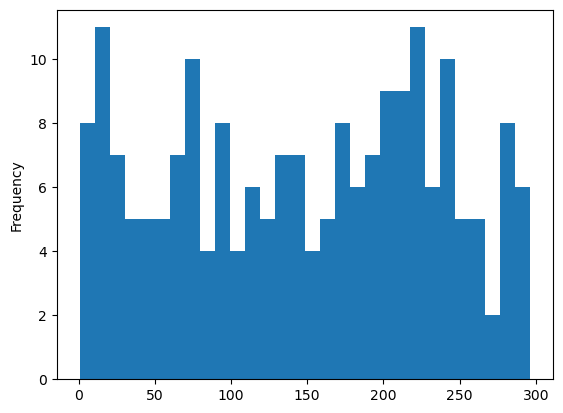

In [8]:
#from graphs there is constant increase in sales with Tv advertisement cost increase
#but in radio and newspaper it is not predictable


#analysing with histograms

data['TV'].plot.hist(bins=30)


<Axes: ylabel='Frequency'>

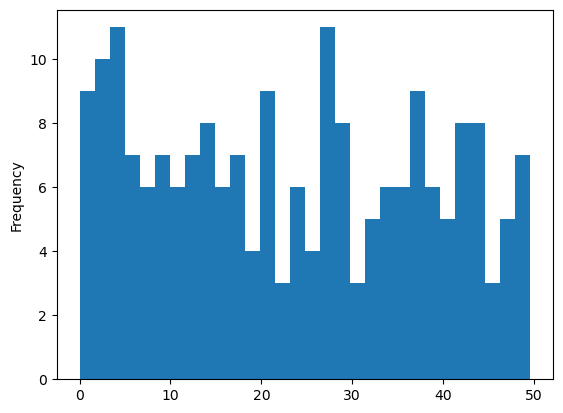

In [9]:
data['Radio'].plot.hist(bins=30)


<Axes: ylabel='Frequency'>

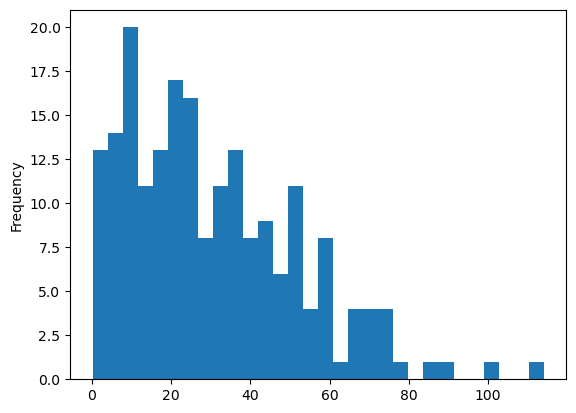

In [10]:
data['Newspaper'].plot.hist(bins=30)


In [11]:
#here more sales is due to low advertising cost in newspaper


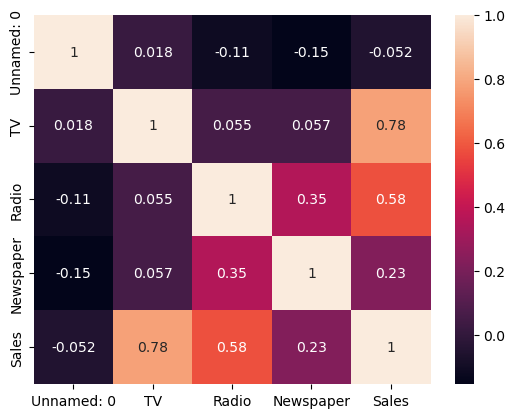

In [12]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
#here sales are more related wiht tv i.e we found 0,78
#so to train our model we consider tv and sales values

#splitting data into training and testing here 30% is used for testing
x_train,x_test,y_train,y_test=train_test_split(data[['TV']],data[['Sales']],test_size=0.3,random_state=1)


In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
predicted=model.predict(x_test)

In [16]:
predicted


array([[17.06764591],
       [16.66823297],
       [11.52879892],
       [20.4073156 ],
       [19.1368937 ],
       [20.57093054],
       [14.78184893],
       [15.62398466],
       [10.32093567],
       [17.2890073 ],
       [14.83959538],
       [10.25356482],
       [17.25532187],
       [12.20731971],
       [17.78947654],
       [12.97246017],
       [13.26119242],
       [20.91259704],
       [ 8.1554438 ],
       [17.06283371],
       [11.75497252],
       [10.18619396],
       [ 8.13138278],
       [12.09182681],
       [12.35649804],
       [15.98971218],
       [ 8.99757953],
       [18.89628349],
       [14.95027608],
       [18.47762173],
       [18.46799732],
       [18.2081383 ],
       [14.12738917],
       [15.11389102],
       [18.87703468],
       [15.82128503],
       [17.62586159],
       [13.15051172],
       [17.35637816],
       [ 7.86671155],
       [ 7.55391828],
       [11.2737521 ],
       [ 7.82340171],
       [16.74522823],
       [ 7.27481044],
       [14

In [17]:
y_test

,Sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6
198,25.5
95,16.9
4,12.9
29,10.5
168,17.1


In [18]:
model.coef_

array([[0.04812204]])

In [19]:
model.intercept_

array([6.92351954])

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,predicted)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,predicted)

print("mean squared error",mse)
print("root mean squared error",rmse)
print("r squared score",r2score)

mean squared error 10.571057434656955
root mean squared error 3.251316261863333
r squared score 0.575061860494331


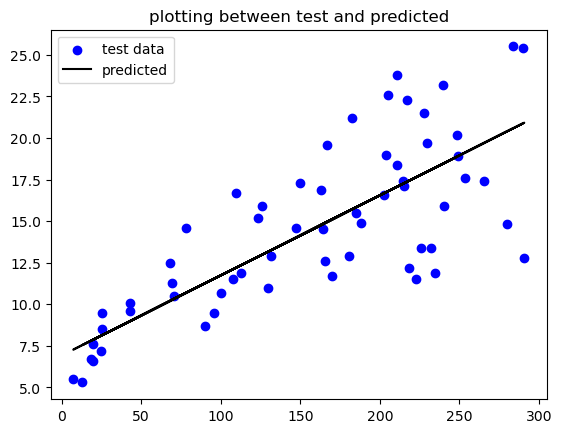

In [21]:
#score is not good so there is huge difference between test and predicted data



plt.scatter(x_test,y_test,color='blue',label='test data')
plt.plot(x_test,predicted,color='black',label='predicted')
plt.title("plotting between test and predicted")
plt.legend()
plt.show()

C:\Users\chipp\AppData\Local\Temp\ipykernel_17008\3027782856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted,bins=30)


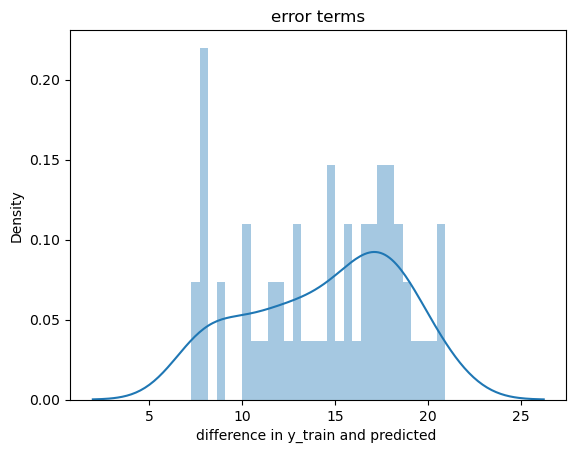

In [22]:
sns.distplot(predicted,bins=30)
plt.title("error terms")
plt.xlabel("difference in y_train and predicted ")
plt.show()